# Проект speech emotion recognition on CREMA-D Dataset

Определение эмоции по звуку - обширная задача, решение которой с развитием голосовых помощников и умных колонок вышло на первый план для лидеров индустрии. 

Более того, решение задачи SER однозначно необходимо в гуманитарной сфере (телефонах поддержки, выявлении фактов домашнего насилия и многое другое).

## Подготовка данных

CREMA-D Dataset — это мультимодальный (видео+аудио) датасет из 7442 оригинальных клипов от 91 актера. Эти клипы были сняты 48 мужчинами и 43 женщинами-актёрами в возрасте от 20 до 74 лет, принадлежащими к разным расам и этническим группам (афроамериканцам, азиатам, кавказцам, латиноамериканцам и неуказанным).

Актеры произносили 12 предложений с одной из шести эмоций (гнев, отвращение, страх, счастье, нейтральная и грустная) и четырех различных уровней эмоций (низкий, средний, высокий и неопределенный).

В данном исследовании используется только аудио часть датасета.

In [1]:
data_path = "/Users/alexandradolidze/Desktop/ML/AudioWAV/"

In [2]:
# ! pip install matplotlib

In [3]:
import os
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
# from matplotlib.pyplot import specgram
from tqdm import tqdm
import IPython.display as ipd

In [4]:
data_list = os.listdir(data_path)

Из названия звуковой дорожки можно извлечь данные, которые лягут в основу датасета:

1004_IEO_SAD_HI.wav

* номер говорящего (в данном исследовании он важен для опредлеения пола);
* кодировка фразы (так как исследование направлено на опредление эмоции только по звуковым характеристикам, то есть задача speech recognition не ставится, этим параметром можно пренебречь);
* эмоция;
* интесивность выражения эмоции.

In [5]:
# раздербанивание дорожки на датасет 
gender = []
emotion = []
intensity = []
path = []

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]


for i in data_list:
    part = i.split('_')
    
    if int(part[0]) in female:
        temp = 1 # 1 - если женщина
    else:
        temp = 0 # 0 - если мужчина
    gender.append(temp)
    
    emotion.append(part[2])
    
    intent, _ = part[3].split('.')
    intensity.append(intent)
    
    path.append(data_path + i)

In [6]:
CREMA_df = pd.DataFrame({
    'emotion': emotion,
    'gender': gender,
    'intensity': intensity,
    'path': path
})

In [7]:
CREMA_df

,emotion,gender,intensity,path
0,ANG,0,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
1,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
2,NEU,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
3,NEU,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
4,DIS,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
...,...,...,...,...
7437,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
7438,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
7439,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
7440,ANG,0,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...


## Data Understanding

In [8]:
CREMA_df.describe(include='all')

,emotion,gender,intensity,path
count,7442,7442.000000,7442,7442
unique,6,NaN,5,7442
top,ANG,NaN,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
freq,1271,NaN,6076,1
mean,NaN,0.471916,NaN,NaN
std,NaN,0.499244,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN
50%,NaN,0.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN


In [9]:
print(CREMA_df.shape)

(7442, 4)


In [10]:
print(CREMA_df['gender'].value_counts())

0    3930
1    3512
Name: gender, dtype: int64


<AxesSubplot: >

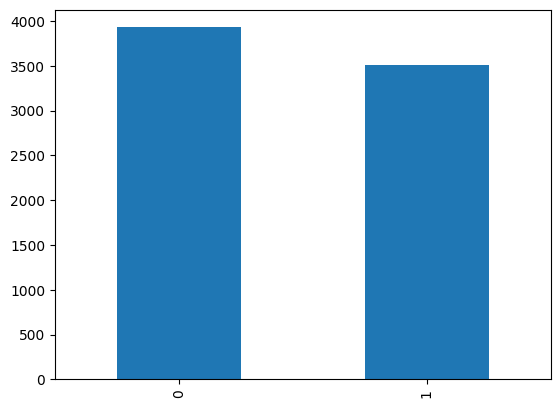

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [11]:
CREMA_df['gender'].value_counts().plot(kind='bar')

In [12]:
plt.close('all')

In [13]:
print(CREMA_df['emotion'].value_counts())

ANG    1271
DIS    1271
SAD    1271
FEA    1271
HAP    1271
NEU    1087
Name: emotion, dtype: int64


<AxesSubplot: >

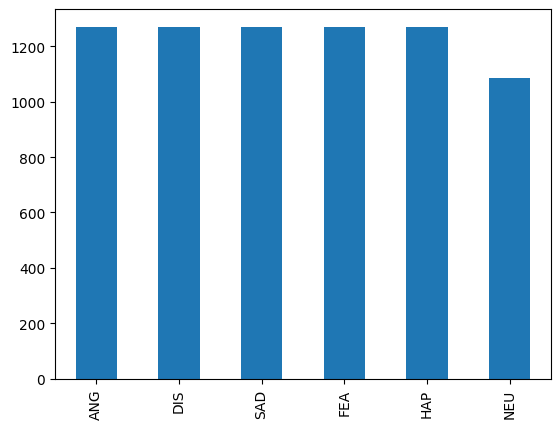

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [14]:
CREMA_df['emotion'].value_counts().plot(kind='bar')

In [15]:
plt.close('all')

In [16]:
print(CREMA_df['intensity'].value_counts())

XX    6076
MD     455
HI     455
LO     455
X        1
Name: intensity, dtype: int64


<AxesSubplot: >

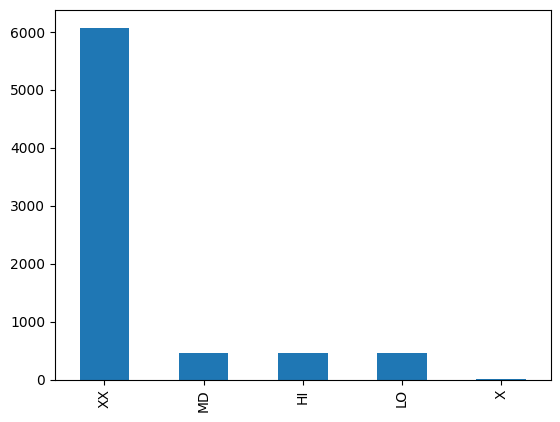

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [17]:
CREMA_df['intensity'].value_counts().plot(kind='bar')

In [18]:
plt.close('all')

## Извлечение фичей из аудио

In [19]:
import numpy as np
from sklearn.decomposition import PCA

In [20]:
mfccs = np.zeros((len(CREMA_df.path), 2))
melspecs = np.zeros((len(CREMA_df.path), 2))
# zero_cross_rates = np.zeros((len(CREMA_df.path), 2))
# rolloffs = np.zeros((len(CREMA_df.path), 2))

for i, path in tqdm(enumerate(CREMA_df.path)):
    X, sample_rate = librosa.load(path)  
    
    # MFCC
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mels = 128)
    
    pca_mfcc = PCA(n_components=2, random_state=322)
    principalComponents_mfcc = pca_mfcc.fit_transform(mfcc)
    mfccs[i] = np.mean(principalComponents_mfcc, axis=0)
      
    # Log Mel-spectogram
    melspec = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels = 128)
    # Конвертируем в логарифмическую шкалу
    melspec_log_S = librosa.amplitude_to_db(melspec)
    
    pca_melspec = PCA(n_components=2, random_state=322)
    principalComponents_melspec = pca_melspec.fit_transform(melspec_log_S)
    melspecs[i] = np.mean(principalComponents_melspec, axis=0)
    
#     # Zero-crossing rate
#     zero_cross_rate = np.mean(librosa.feature.zero_crossing_rate(X), axis=0)
#     print(zero_cross_rate)
#     print(np.squeeze(zero_cross_rate).shape)
    
    
#     np.vstack((tp, fp)).T
#     if len(zero_cross_rate) < 216:
#         zero_cross_rate = np.pad(zero_cross_rate, (0, 216-len(zero_cross_rate)), 'constant', constant_values=(0))
#     zero_cross_rates[i] = zero_cross_rate  

#     # Sectral roll-off
#     zero_cross_rate = np.mean(librosa.feature.zero_crossing_rate(X), axis = 0)
#     if len(zero_cross_rate) < 216:
#         zero_cross_rate = np.pad(zero_cross_rate, (0, 216-len(zero_cross_rate)), 'constant', constant_values=(0))
#     zero_cross_rates[i] = zero_cross_rate  


4653it [01:58, 43.93it/s]/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:527: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
7442it [03:16, 37.94it/s]


In [21]:
ipd.Audio(CREMA_df.path[0])

Text(0.5, 1.0, 'Audio sampled at 22050 hrz')

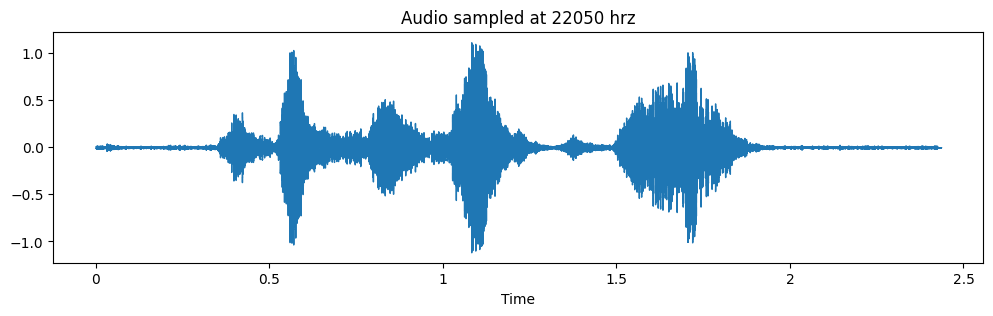

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [22]:
# визуализация фичей

X, sample_rate = librosa.load(CREMA_df.path[0]) 

# 

plt.figure(figsize=(12, 3))
librosa.display.waveshow(X, sr=sample_rate)
plt.title(f'Audio sampled at {sample_rate} hrz')

In [23]:
plt.close('all')

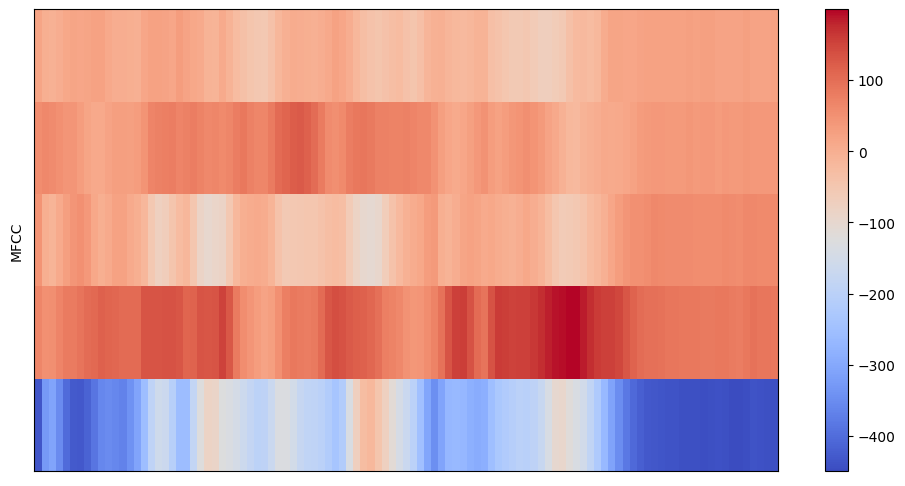

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [24]:
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc = 5)

plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

In [25]:
plt.close('all')

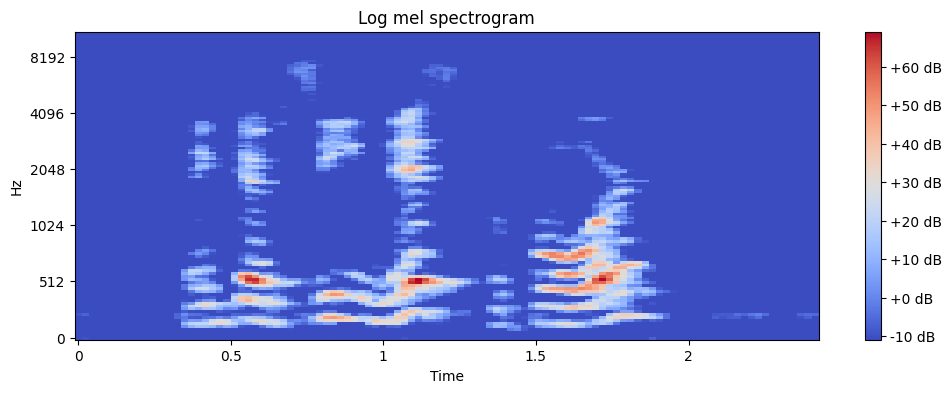

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [26]:
melspec = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128)

log_S = librosa.amplitude_to_db(melspec)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Log mel spectrogram')
plt.colorbar(format='%+02.0f dB')

In [27]:
plt.close('all')

In [28]:
principalComponents_mfcc_df = pd.DataFrame(data = mfccs) 
principalComponents_melspec_df = pd.DataFrame(data = melspecs) 
# principalComponents_zero_crossing_df = pd.DataFrame(data = zero_cross_rates)

In [29]:
CREMA_df

,emotion,gender,intensity,path
0,ANG,0,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
1,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
2,NEU,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
3,NEU,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
4,DIS,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
...,...,...,...,...
7437,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
7438,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
7439,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...
7440,ANG,0,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...


In [30]:
principalComponents_mfcc_df = principalComponents_mfcc_df.add_suffix('_MFCC')
principalComponents_melspec_df = principalComponents_melspec_df.add_suffix('_Melspec')
# principalComponents_zero_crossing_df = principalComponents_zero_crossing_df.add_suffix('_Zero-Crossing')

CREMA_df = pd.concat([CREMA_df, principalComponents_mfcc_df, principalComponents_melspec_df], axis=1)

CREMA_df

,emotion,gender,intensity,path,0_MFCC,1_MFCC,0_Melspec,1_Melspec
0,ANG,0,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000007,0.000017,-0.000011,0.000004
1,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,0.000045,0.000005,0.000211,0.000082
2,NEU,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000008,-0.000001,-0.000307,0.000053
3,NEU,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000008,0.000003,0.000433,0.000165
4,DIS,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,0.000015,0.000002,0.000179,-0.000169
...,...,...,...,...,...,...,...,...
7437,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,0.000003,-0.000006,0.000050,0.000019
7438,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000024,0.000023,0.000060,0.000081
7439,ANG,1,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000016,-0.000005,-0.000044,-0.000032
7440,ANG,0,XX,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000063,0.000005,-0.000088,-0.000178


In [31]:
CREMA_df.shape

(7442, 8)

## Классификация

In [32]:
# Перекодируем intensity

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

intesity_value = CREMA_df['intensity'].values

le.fit(intesity_value)
print(le.classes_)
CREMA_df['intensity'] = list(le.transform(intesity_value))

['HI' 'LO' 'MD' 'X' 'XX']


In [33]:
CREMA_df

,emotion,gender,intensity,path,0_MFCC,1_MFCC,0_Melspec,1_Melspec
0,ANG,0,4,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000007,0.000017,-0.000011,0.000004
1,ANG,1,4,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,0.000045,0.000005,0.000211,0.000082
2,NEU,1,4,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000008,-0.000001,-0.000307,0.000053
3,NEU,1,4,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000008,0.000003,0.000433,0.000165
4,DIS,1,4,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,0.000015,0.000002,0.000179,-0.000169
...,...,...,...,...,...,...,...,...
7437,ANG,1,4,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,0.000003,-0.000006,0.000050,0.000019
7438,ANG,1,4,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000024,0.000023,0.000060,0.000081
7439,ANG,1,4,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000016,-0.000005,-0.000044,-0.000032
7440,ANG,0,4,/Users/alexandradolidze/Desktop/ML/AudioWAV/10...,-0.000063,0.000005,-0.000088,-0.000178


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, silhouette_score

### Определение пола говорящего (бинарная классификация)

In [35]:
binary_X = CREMA_df.drop(columns=['emotion', 'path', 'gender'], axis=1).values
binary_y = CREMA_df['gender'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(binary_X, binary_y, test_size=0.33, random_state=322)

#### Рандомный бейзлайн

In [37]:
from collections import Counter

In [38]:
num_samples = CREMA_df.shape[0]  
prior_class_counts = Counter(binary_y)  
prior_class_probs = dict()
for class_label in prior_class_counts:
    prior_class_probs[class_label] = prior_class_counts[class_label] / num_samples

In [39]:
import random
random.seed(322)

random_pred = random.choices([0, 1], 
                             weights=(list(prior_class_probs.values())),
                             k=len(X_test))

print("Accuracy: {:.4}".format(accuracy_score(y_test, random_pred)))

print(classification_report(y_test, random_pred, target_names = ['male', 'female']))

Accuracy: 0.4853
              precision    recall  f1-score   support

        male       0.51      0.52      0.52      1298
      female       0.45      0.45      0.45      1158

    accuracy                           0.49      2456
   macro avg       0.48      0.48      0.48      2456
weighted avg       0.48      0.49      0.49      2456



#### Логистическая регрессия

In [40]:
model_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(class_weight = 'balanced'))
], verbose=True)

In [41]:
model_log_reg.fit(X_train, y_train)
y_pred_log_reg = model_log_reg.predict(X_test)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing log_reg, total=   0.0s


In [42]:
print("Accuracy: {:.4}".format(accuracy_score(y_test, y_pred_log_reg)))

print(classification_report(y_test, y_pred_log_reg, target_names = ['male', 'female']))

Accuracy: 0.5106
              precision    recall  f1-score   support

        male       0.54      0.49      0.51      1298
      female       0.48      0.54      0.51      1158

    accuracy                           0.51      2456
   macro avg       0.51      0.51      0.51      2456
weighted avg       0.51      0.51      0.51      2456



#### Naive Bayes

In [43]:
model_naive = Pipeline([
    ('scaler', StandardScaler()),
    ('naive_bayes', GaussianNB())
], verbose=True)

In [44]:
model_naive.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ....... (step 2 of 2) Processing naive_bayes, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('naive_bayes', GaussianNB())],
         verbose=True)

In [45]:
y_pred_naive = model_naive.predict(X_test)

In [46]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_naive):.4}')

print(classification_report(y_test, y_pred_naive, target_names = ['male', 'female']))

Accuracy: 0.5651
              precision    recall  f1-score   support

        male       0.56      0.81      0.66      1298
      female       0.58      0.29      0.39      1158

    accuracy                           0.57      2456
   macro avg       0.57      0.55      0.53      2456
weighted avg       0.57      0.57      0.53      2456



### Определение эмоции говорящего (мультиклассовая классификация)

In [47]:
multiclass_X = CREMA_df.drop(columns=['path', 'emotion', 'gender'], axis=1).values
multiclass_y = CREMA_df['emotion'].values

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [49]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(multiclass_X, multiclass_y, test_size=0.33, random_state=322)

#### MultinomialNB (вместо бейзлайна)

In [50]:
model_multibayes = Pipeline([
    ('minmax', MinMaxScaler()),
    ('naive_bayes', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))
], verbose=True)

In [51]:
model_multibayes.fit(X_train_multiclass, y_train_multiclass)
y_pred_multibayes = model_multibayes.predict(X_test_multiclass)

[Pipeline] ............ (step 1 of 2) Processing minmax, total=   0.0s
[Pipeline] ....... (step 2 of 2) Processing naive_bayes, total=   0.0s


In [52]:
print(f'Accuracy: {accuracy_score(y_test_multiclass, y_pred_multibayes):.4}')
print(classification_report(y_test_multiclass, y_pred_multibayes))

Accuracy: 0.1641
              precision    recall  f1-score   support

         ANG       0.16      0.94      0.28       398
         DIS       0.00      0.00      0.00       428
         FEA       0.00      0.00      0.00       445
         HAP       0.00      0.00      0.00       426
         NEU       0.00      0.00      0.00       355
         SAD       0.21      0.07      0.11       404

    accuracy                           0.16      2456
   macro avg       0.06      0.17      0.06      2456
weighted avg       0.06      0.16      0.06      2456



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

#### Дерево решений

In [55]:
decition_tree = DecisionTreeClassifier()
decition_tree.fit(X_train_multiclass, y_train_multiclass)
y_pred_decision_tree = decition_tree.predict(X_test_multiclass)

In [56]:
print(f'Accuracy: {accuracy_score(y_test_multiclass, y_pred_decition_tree):.4}')

print(classification_report(y_test_multiclass, y_pred_decision_tree))

Accuracy: 0.2333
              precision    recall  f1-score   support

         ANG       0.32      0.35      0.33       398
         DIS       0.17      0.17      0.17       428
         FEA       0.17      0.15      0.16       445
         HAP       0.23      0.23      0.23       426
         NEU       0.20      0.20      0.20       355
         SAD       0.29      0.29      0.29       404

    accuracy                           0.23      2456
   macro avg       0.23      0.23      0.23      2456
weighted avg       0.23      0.23      0.23      2456



In [57]:
# улучшие decition tree

#### K-Neighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_multiclass, y_train_multiclass)

y_pred_neigh = neigh.predict(X_test_multiclass)

In [60]:
print(f'Accuracy: {accuracy_score(y_test_multiclass, y_pred_neigh):.4}')

print(classification_report(y_test_multiclass, y_pred_neigh))

Accuracy: 0.2801
              precision    recall  f1-score   support

         ANG       0.35      0.55      0.43       398
         DIS       0.21      0.22      0.22       428
         FEA       0.20      0.15      0.17       445
         HAP       0.26      0.21      0.23       426
         NEU       0.27      0.27      0.27       355
         SAD       0.34      0.30      0.32       404

    accuracy                           0.28      2456
   macro avg       0.27      0.28      0.27      2456
weighted avg       0.27      0.28      0.27      2456



In [61]:
# поподбираем n_neighbors
for i in range(5, 65, 5):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh_model = neigh.fit(X_train_multiclass, y_train_multiclass)
    y_pred_neigh = neigh_model.predict(X_test_multiclass)
    accuracy = accuracy_score(y_test_multiclass, y_pred_neigh)
    print(f'Accuracy: {accuracy:.4}, step/iter : {i}')

Accuracy: 0.2801, step/iter : 5
Accuracy: 0.2944, step/iter : 10
Accuracy: 0.305, step/iter : 15
Accuracy: 0.3119, step/iter : 20
Accuracy: 0.3184, step/iter : 25
Accuracy: 0.3241, step/iter : 30
Accuracy: 0.3233, step/iter : 35
Accuracy: 0.3294, step/iter : 40
Accuracy: 0.327, step/iter : 45
Accuracy: 0.3286, step/iter : 50
Accuracy: 0.3249, step/iter : 55
Accuracy: 0.3229, step/iter : 60


In [62]:
for i in range(45, 55):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh_model = neigh.fit(X_train_multiclass, y_train_multiclass)
    y_pred_neigh = neigh_model.predict(X_test_multiclass)
    accuracy = accuracy_score(y_test_multiclass, y_pred_neigh)
    print(f'Accuracy: {accuracy:.4}, step/iter : {i}')

Accuracy: 0.327, step/iter : 45
Accuracy: 0.3249, step/iter : 46
Accuracy: 0.3257, step/iter : 47
Accuracy: 0.3274, step/iter : 48
Accuracy: 0.3265, step/iter : 49
Accuracy: 0.3286, step/iter : 50
Accuracy: 0.3278, step/iter : 51
Accuracy: 0.3265, step/iter : 52
Accuracy: 0.3282, step/iter : 53
Accuracy: 0.3253, step/iter : 54


In [63]:
neigh = KNeighborsClassifier(n_neighbors = 50)
neigh.fit(X_train_multiclass, y_train_multiclass)

y_pred_neigh = neigh.predict(X_test_multiclass)

In [64]:
print(f'Accuracy: {accuracy_score(y_test_multiclass, y_pred_neigh):.4}')

print(classification_report(y_test_multiclass, y_pred_neigh))

Accuracy: 0.3286
              precision    recall  f1-score   support

         ANG       0.36      0.71      0.48       398
         DIS       0.20      0.07      0.11       428
         FEA       0.27      0.03      0.06       445
         HAP       0.31      0.29      0.30       426
         NEU       0.27      0.41      0.33       355
         SAD       0.39      0.52      0.44       404

    accuracy                           0.33      2456
   macro avg       0.30      0.34      0.29      2456
weighted avg       0.30      0.33      0.28      2456



## К-means (кластеризация)

In [65]:
from sklearn.cluster import KMeans

In [66]:
inertia = []
silhouette = {}

for i in tqdm(range(2,7)): 
    
    kmeans = KMeans(
               n_clusters=i, 
               init='k-means++', 
               n_init=15,
               max_iter=500, 
               random_state=322 
    ) 
    
    
    kmeans.fit(X_train_multiclass)
    
    inertia.append(kmeans.inertia_)
    silhouette[i] = silhouette_score(X_train_multiclass, kmeans.labels_, metric='euclidean')

100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.25it/s]


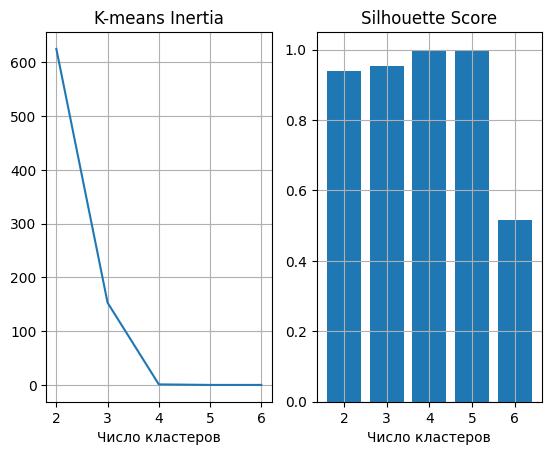

AttributeError: module 'matplotlib' has no attribute 'pyplot'

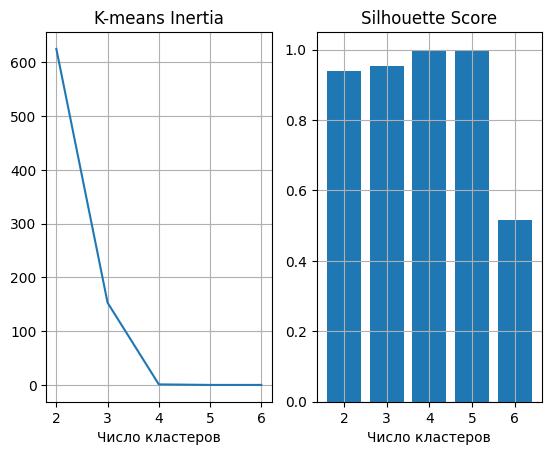

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [67]:
plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia) 

plt.xlabel('Число кластеров')
plt.title('K-means Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center')
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid(True)
plt.title('Silhouette Score')
plt.xlabel('Число кластеров')


plt.show()

In [68]:
print(f'Inertia: {kmeans.inertia_:.4}')
print(f'Silhouette Score: {silhouette_score(X_train_multiclass, kmeans.labels_):.4}')

Inertia: 0.0003709
Silhouette Score: 0.5154
